<a href="https://colab.research.google.com/github/kavyaagarwal178/bank_ccp/blob/main/bank_customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank customer churn prediction**

 Import the libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Open drive in google colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the csv file

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

Display the contents

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Remove the columns not needed

In [8]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

Displaying the content after deletion of columns

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Displaying the data type of the objects

In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

Data analysis

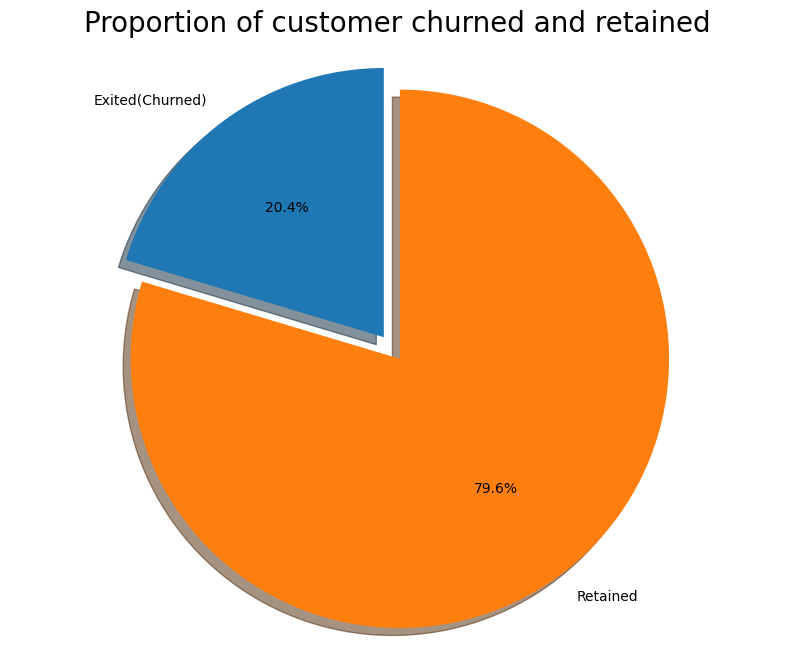

In [13]:
labels = 'Exited(Churned)','Retained'
sizes = [df.Exited[df['Exited']==1].count(),df.Exited[df['Exited']==0].count()]
explode = (0,0.1)
fig1,ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()



In [14]:
import seaborn as sns

<Axes: xlabel='IsActiveMember', ylabel='count'>

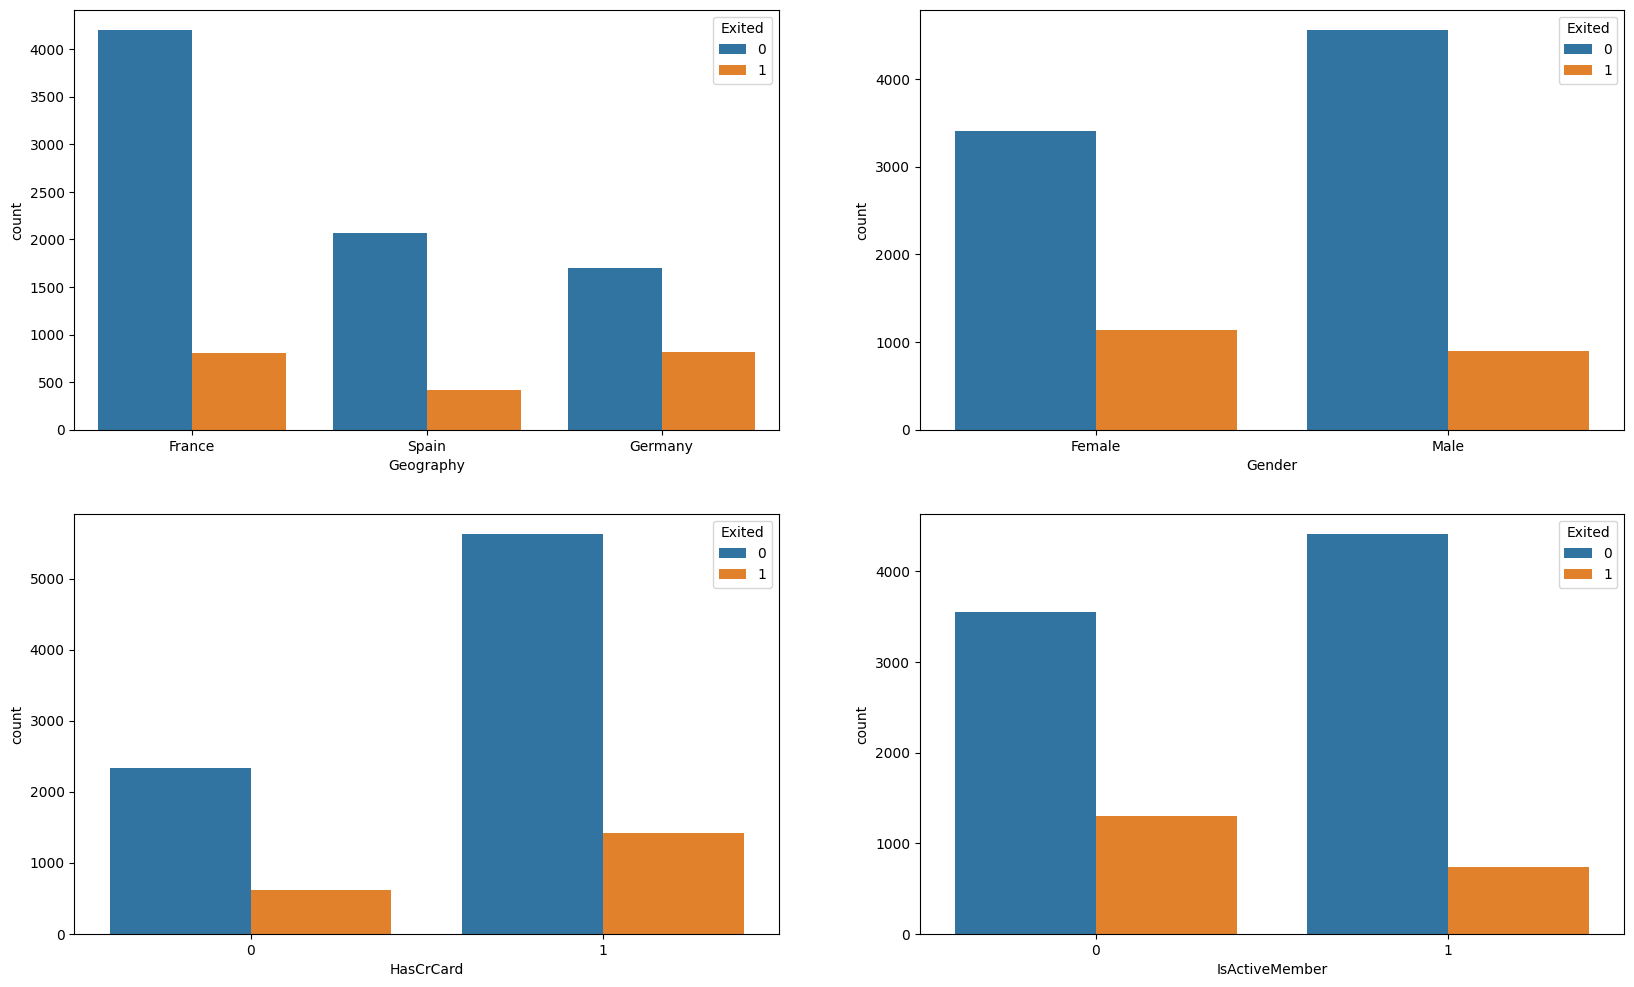

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

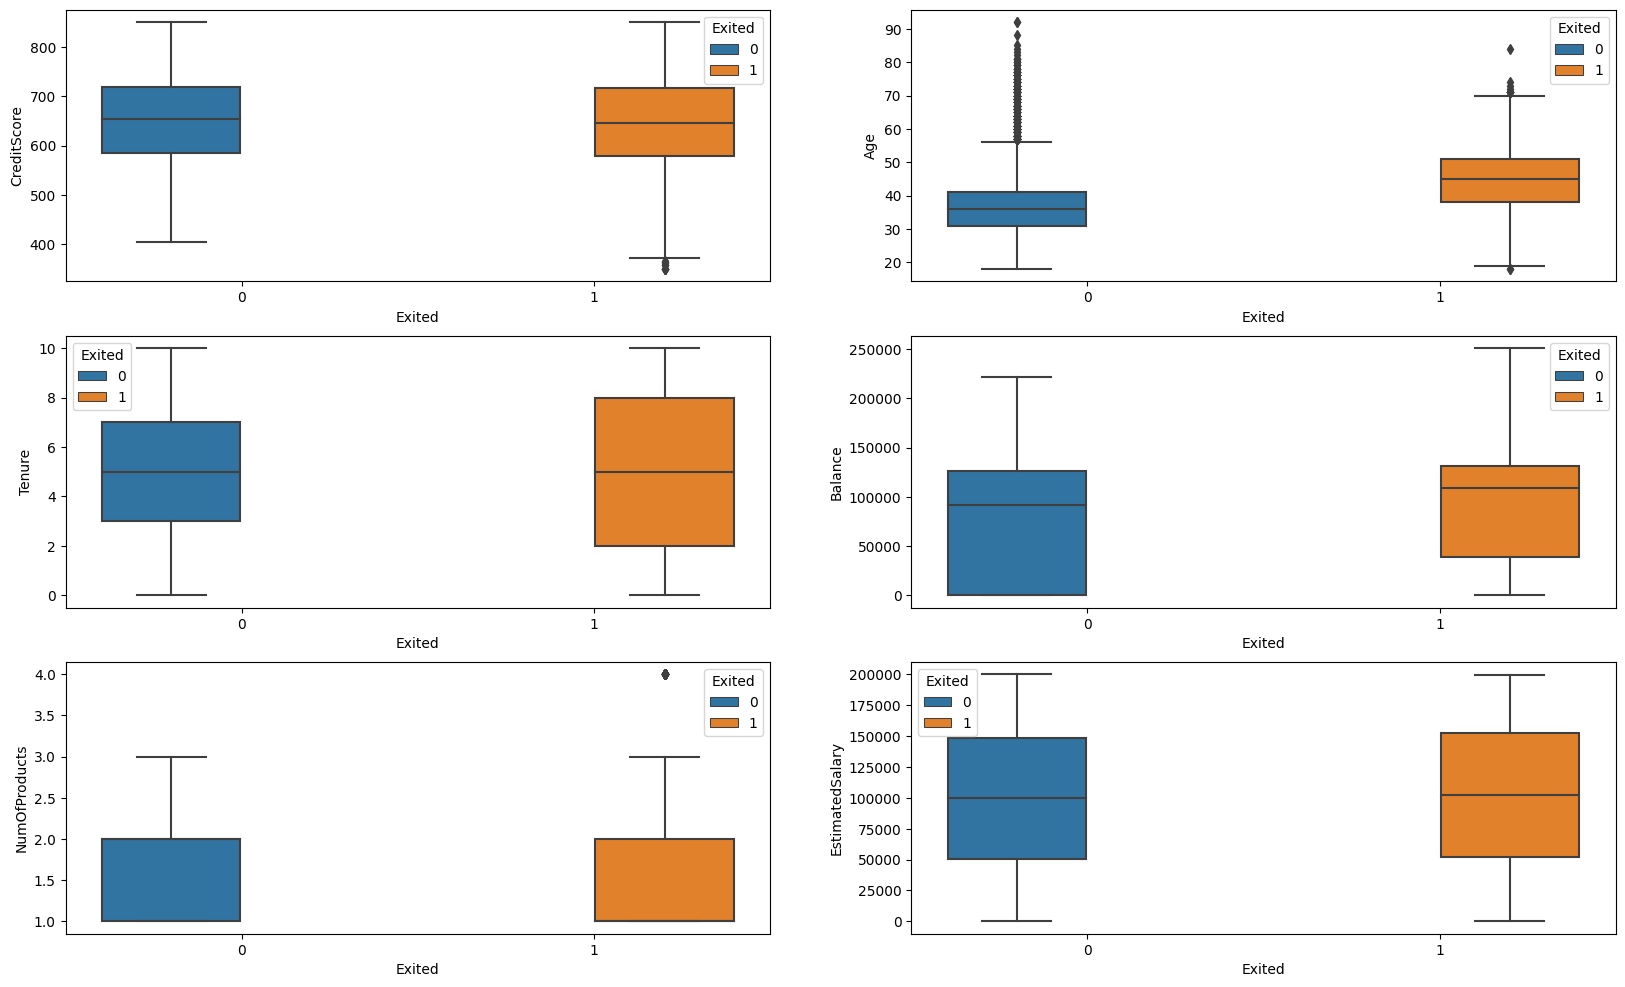

In [16]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

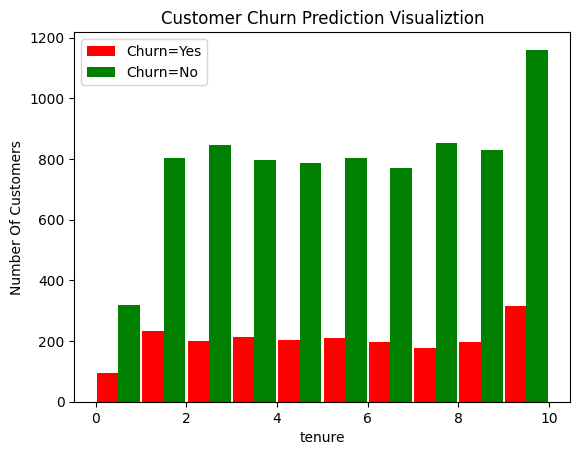

In [17]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Feature Engineering

(-1.0, 5.0)

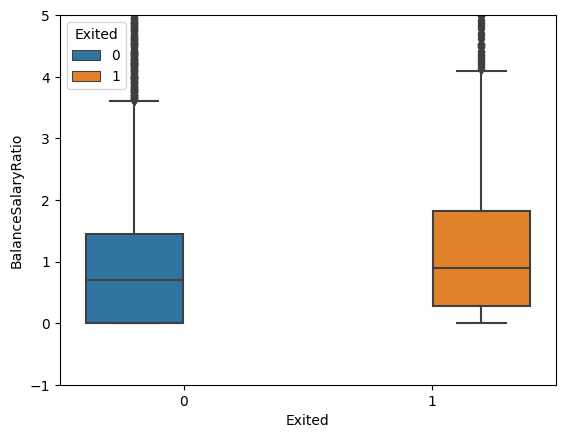

In [18]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

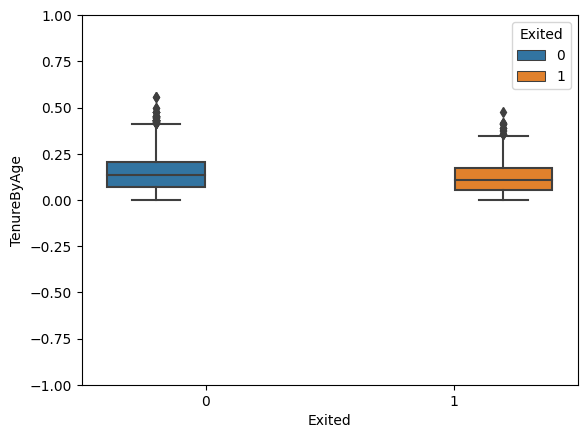

In [19]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

Print the categorical variables

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [21]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


Label encoding

In [22]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

One hot encoding method

In [23]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [24]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [25]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [26]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [27]:
len(X_train.columns)

14

Model building and prediction : Sequential Model

In [52]:
import tensorflow as tf
from tensorflow import keras

# Assuming X_train is of shape (num_samples, 32, 14) and y_train is your target variable
# If X_train is already in the correct shape, you can omit the reshaping step
# X_train = X_train.reshape((X_train.shape[0], 32, 14))

model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(None,32, 14)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6254 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7956
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4108 - accura

In [53]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8415


[0.3790408670902252, 0.8414999842643738]

In [54]:

yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 3ms/step


array([[0.0272096 ],
       [0.10982879],
       [0.058831  ],
       ...,
       [0.00891017],
       [0.01583729],
       [0.06224358]], dtype=float32)

Converting our predictions to 0,1 to check accuracy

In [55]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [56]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


Checking the accuracy

In [57]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1595
           1       0.65      0.46      0.54       405

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

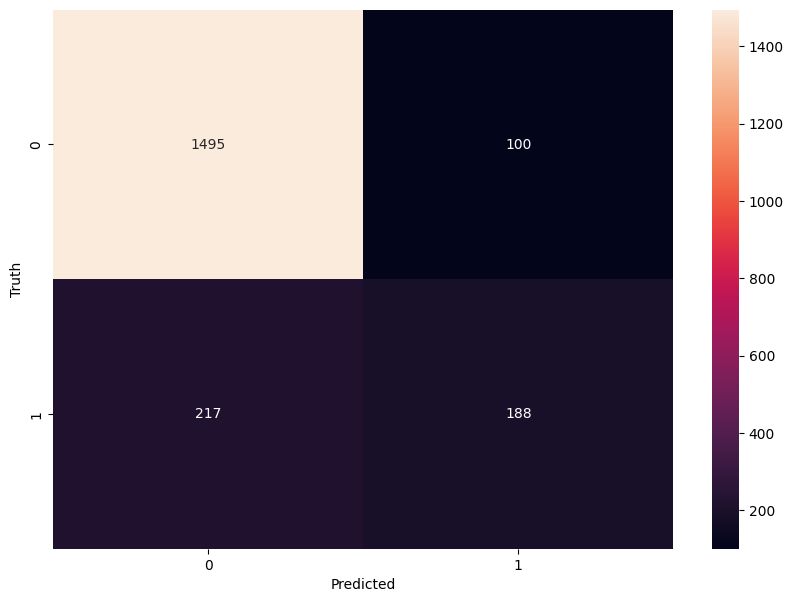

In [58]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  84.15 %


H2O Auto ML

Installing H2O Auto ML

In [61]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [62]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=d5436294deb55cfbb0397fc427169562f7bef818fa14fa8fb8126d8ceeb12d0c
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


Importing the h2o Python module and H2OAutoML class

In [63]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxrytk1y5
  JVM stdout: /tmp/tmpxrytk1y5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxrytk1y5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_svipff
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Loading the data

In [64]:
df = h2o.import_file("/content/drive/MyDrive/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [65]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


 H2O auto ml can do all the data preprocessing techniques

In [66]:
df_train,df_test= df.split_frame(ratios=[.8])

Splitting the data

In [67]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0
13,1.56323e+07,Kay,476,France,Female,34,10,0,2,1,0,26261,0


In [68]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

Defining the model

In [69]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

Fitting the model

In [70]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
10:14:11.816: Project: AutoML_1_20231224_101411
10:14:11.817: Setting stopping tolerance adaptively based on the training frame: 0.011192939034924606
10:14:11.817: Build control seed: 10
10:14:11.818: training frame: Frame key: AutoML_1_20231224_101411_training_py_3_sid_beff    cols: 14    rows: 7982  chunks: 8    size: 426714  checksum: 6971561403597482978
10:14:11.818: validation frame: NULL
10:14:11.819: leaderboard frame: NULL
10:14:11.819: blending frame: NULL
10:14:11.819: response column: Exited
10:14:11.819: fold column: null
10:14:11.819: weights column: null
10:14:11.915: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


Seeing the leaderboard

In [71]:
lb = aml.leaderboard

In [72]:
lb


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231224_101411,0.32433,0.10519,0.214194,0.228041,0.10519
StackedEnsemble_BestOfFamily_1_AutoML_1_20231224_101411,0.325149,0.105722,0.21622,0.22885,0.105722
GBM_1_AutoML_1_20231224_101411,0.325987,0.106268,0.218853,0.229375,0.106268
GBM_2_AutoML_1_20231224_101411,0.326196,0.106404,0.215942,0.228993,0.106404
GBM_3_AutoML_1_20231224_101411,0.329264,0.108415,0.217935,0.231517,0.108415
GBM_4_AutoML_1_20231224_101411,0.331572,0.10994,0.220798,0.233338,0.10994
DRF_1_AutoML_1_20231224_101411,0.332804,0.110758,0.219218,0.235191,0.110758
XGBoost_3_AutoML_1_20231224_101411,0.334981,0.112212,0.223072,0.237076,0.112212
XRT_1_AutoML_1_20231224_101411,0.342489,0.117298,0.250728,0.243589,0.117298
XGBoost_2_AutoML_1_20231224_101411,0.357035,0.127474,0.243479,0.25789,0.127474


Getting all model ids

In [73]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [74]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20231224_101411',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231224_101411',
 'GBM_1_AutoML_1_20231224_101411',
 'GBM_2_AutoML_1_20231224_101411',
 'GBM_3_AutoML_1_20231224_101411',
 'GBM_4_AutoML_1_20231224_101411',
 'DRF_1_AutoML_1_20231224_101411',
 'XGBoost_3_AutoML_1_20231224_101411',
 'XRT_1_AutoML_1_20231224_101411',
 'XGBoost_2_AutoML_1_20231224_101411',
 'XGBoost_1_AutoML_1_20231224_101411',
 'GLM_1_AutoML_1_20231224_101411']

In [75]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.0953435772457491
RMSE: 0.3087775530147052
MAE: 0.2048137267443534
RMSLE: 0.21834767296528348
Mean Residual Deviance: 0.0953435772457491
R^2: 0.4000773518792986
Null degrees of freedom: 2017
Residual degrees of freedom: 2010
Null deviance: 320.8088319302235
Residual deviance: 192.40333888192168
AIC: 1001.9944724997185

Getting the model details for best performing model

In [76]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [77]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20231224_101411',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20231224_101411'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231224_101411_training_py_3_sid_beff',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231224_101411_training_py_3_sid_beff'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231224_101411_training_py_3_sid_beff',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231224_101411_training_py_3_sid_beff'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'sch

In [79]:
#output.varimp_plot()

In [80]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,2
Metalearner fold_column,None


In [81]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [82]:
y_pred

predict
0.166603
0.0355235
-0.0129116
0.0421813
0.551408
0.0174734
0.0316265
0.230495
-0.00946969
0.42351
